In [13]:
import numpy as np
import glob
from skimage import filters, color, io, exposure
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from skimage.color import rgb2gray
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

print("Colin Del Tufo Programming Assignment 2\n")

print("1. Use images from ALL FOUR classes. "
"2. Convert the images to edge histograms. (Assignment 1 - These will be the vector representations of the "
"images). This will be your dataset for Part 3. (0.25 point)\n")

# Paths to directories containing images for each class
paths_to_directories = {
    'Otterhound': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Otterhound',
    'Labrador Retriever': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Labrador_Retriever',
    'Standard Schnauzer': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Standard_Schnauzer',
    'Chow': r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped\Chow'
}

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

def image_processor(image_path):
    original = io.imread(image_path)
    greyscale = rgb2gray(original)

    angle_sobel = angle(filters.sobel_h(greyscale),
                        filters.sobel_v(greyscale))

    histogram, bins = exposure.histogram(angle_sobel, nbins=36)
    return histogram

class_histograms = {class_name: [] for class_name in paths_to_directories}

for class_name, directory in paths_to_directories.items():
    image_paths = glob.glob(f"{directory}/*.jpg") 
    for image_path in image_paths:
        histogram = image_processor(image_path)
        class_histograms[class_name].append(histogram)

print(class_histograms)

Colin Del Tufo Programming Assignment 2

1. Use images from ALL FOUR classes. 2. Convert the images to edge histograms. (Assignment 1 - These will be the vector representations of the images). This will be your dataset for Part 3. (0.25 point)

{'Otterhound': [array([4003,  416,  371,  398,  338,  336,  287,  296,  282,  352,  305,
        285,  322,  320,  345,  319,  358,  341,  510,  332,  324,  370,
        340,  368,  343,  336,  345,  401,  353,  337,  354,  360,  365,
        379,  425,  468]), array([2084,  622,  589,  505,  491,  399,  426,  355,  343,  344,  337,
        371,  367,  327,  342,  348,  312,  397,  424,  311,  320,  304,
        319,  346,  307,  356,  312,  350,  350,  429,  429,  456,  484,
        540,  605,  783]), array([370, 363, 321, 366, 382, 367, 397, 361, 428, 401, 418, 461, 519,
       518, 547, 598, 607, 621, 608, 656, 600, 585, 538, 523, 479, 481,
       444, 403, 434, 400, 377, 371, 395, 347, 358, 340]), array([582, 570, 593, 577, 558, 580, 499, 51

In [14]:
from sklearn.model_selection import train_test_split

print("3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20. (0.25 point)\n")

print("The website used for this part was: \n https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html\n")

training_set = {}
test_set = {}

for class_name, histograms in class_histograms.items():
    train, test = train_test_split(histograms, test_size=0.2)
    
    training_set[class_name] = train
    test_set[class_name] = test

print(f"Otterhound: Number of training sets: {len(training_set['Otterhound'])} Number of test sets: {len(test_set['Otterhound'])}")
print(f"Labrador Retriever: Number of training sets: {len(training_set['Labrador Retriever'])} Number of test sets: {len(test_set['Labrador Retriever'])}")
print(f"Standard Schnauzer: Number of training sets: {len(training_set['Standard Schnauzer'])} Number of test sets: {len(test_set['Standard Schnauzer'])}")
print(f"Chow: Number of training sets: {len(training_set['Chow'])} Number of test sets: {len(test_set['Chow'])}")


3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20. (0.25 point)

The website used for this part was: 
 https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html

Otterhound: Number of training sets: 129 Number of test sets: 33
Labrador Retriever: Number of training sets: 151 Number of test sets: 38
Standard Schnauzer: Number of training sets: 149 Number of test sets: 38
Chow: Number of training sets: 162 Number of test sets: 41


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

print("4. Perform standardization on the training dataset. (see https://scikit-learn.org/stable/modules/preprocessing.html (0.25 point)")
print("Used 6.3.1. Standardization, or mean removal and variance scaling\n")

all_training_data = []

for class_name, histograms in training_set.items():
    all_training_data.extend(histograms) 

train_data_array = np.array(all_training_data)

scaler = preprocessing.StandardScaler().fit(train_data_array)

print(scaler.mean_)
print(scaler.scale_)
print("")

train_data_standardized = scaler.transform(train_data_array)

print("Our standardized training set is:", train_data_standardized.shape)

4. Perform standardization on the training dataset. (see https://scikit-learn.org/stable/modules/preprocessing.html (0.25 point)
Used 6.3.1. Standardization, or mean removal and variance scaling

[692.5143824  490.07952623 468.72419628 452.82233503 432.0964467
 426.89509306 414.60744501 407.69035533 410.73434856 422.99153976
 409.60575296 420.14890017 431.39255499 437.74619289 457.33671743
 472.07783418 488.69881557 525.54145516 552.97800338 490.05752961
 474.63451777 461.21996616 439.12690355 435.08967851 423.5143824
 415.47884941 411.16243655 426.50592217 408.18612521 415.678511
 426.39593909 431.44839255 452.90862944 467.94416244 488.20642978
 501.75972927]
[544.93770523 105.97053882  92.31183857  78.74083456  68.27452179
  61.52431316  56.39045243  50.80646293  47.79442181  52.89530824
  48.17584718  50.95449177  56.74654856  66.4294077   77.76444967
  91.86048809 107.2149697  160.81102999 185.12104566 114.11919767
  95.82456347  80.55250628  70.37712627  60.61652016  54.80662248
 

In [16]:
print("5. Perform standardization on the test dataset using the means and variances you obtained from the training dataset.")
print("Used my train_data_array to fit the scaler for my test data\n")

all_test_data = []

for class_name, histograms in test_set.items():
    all_test_data.extend(histograms) 

test_data_array = np.array(all_test_data)

scaler = preprocessing.StandardScaler().fit(train_data_array)

test_data_standardized = scaler.transform(test_data_array)

print("Our standardized test set using mean and variance from the training set is:", test_data_standardized.shape)


5. Perform standardization on the test dataset using the means and variances you obtained from the training dataset.
Used my train_data_array to fit the scaler for my test data

Our standardized test set using mean and variance from the training set is: (150, 36)


6. (Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class classification problem using the three classification methods (available on canvas) assigned to you. Plot the (3) confusion matrices for using three approaches (clearly label the classes) on the test set (See Figure 1). (If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) (3.75 points)
Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation
Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
Used this website for Naive Bayes info: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes



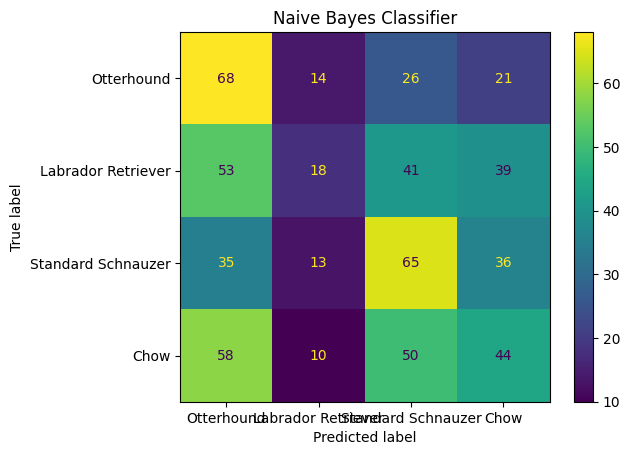

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("6. (Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class classification problem using the three classification methods (available on canvas) assigned to you. Plot the (3) confusion matrices for using three approaches (clearly label the classes) on the test set (See Figure 1). (If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) (3.75 points)")
print("Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation")
print("Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html")
print("Used this website for Naive Bayes info: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes\n")

class_labels = {'Otterhound': 0, 'Labrador Retriever': 1, 'Standard Schnauzer': 2, 'Chow': 3}

all_histograms = []
all_labels = []

for class_name, histograms in training_set.items(): 
    all_histograms.extend(histograms)
    all_labels.extend([class_labels[class_name]] * len(histograms))

all_histograms = np.array(all_histograms)
all_labels = np.array(all_labels)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=150)
model = GaussianNB()

all_true_labels = []
all_pred_labels = []

for train_index, test_index in stratified_k_fold.split(all_histograms, all_labels):
    X_train, X_test = all_histograms[train_index], all_histograms[test_index]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    all_true_labels.extend(y_test)
    all_pred_labels.extend(y_pred)

conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels.keys())
display.plot(cmap=plt.cm.viridis)
plt.title("Naive Bayes Classifier")
plt.show()


Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Used this website for Decision Tree info: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



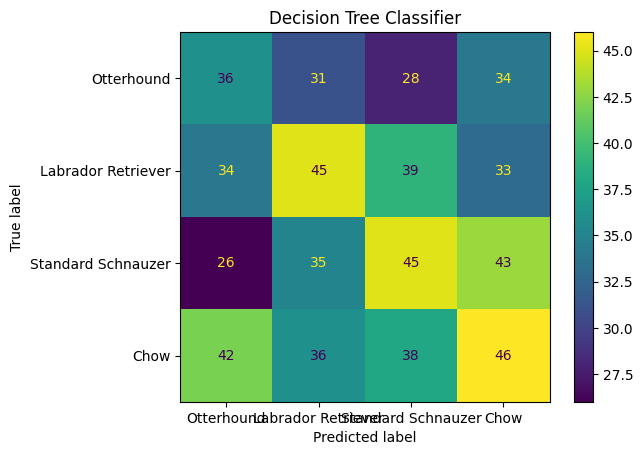

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/\n")
print("Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html\n")
print("Used this website for Decision Tree info: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html\n")

class_labels = {'Otterhound': 0, 'Labrador Retriever': 1, 'Standard Schnauzer': 2, 'Chow': 3}

all_histograms = []
all_labels = []
for class_name, histograms in training_set.items(): 
    all_histograms.extend(histograms)
    all_labels.extend([class_labels[class_name]] * len(histograms))

all_histograms = np.array(all_histograms)
all_labels = np.array(all_labels)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)

all_true_labels = []
all_pred_labels = []

for train_index, test_index in stratified_k_fold.split(all_histograms, all_labels):
    X_train, X_test = all_histograms[train_index], all_histograms[test_index]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    all_true_labels.extend(y_test)
    all_pred_labels.extend(y_pred)

conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels.keys())
display.plot(cmap=plt.cm.viridis)
plt.title("Decision Tree Classifier")
plt.show()

Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Used this website for Random Forest info: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



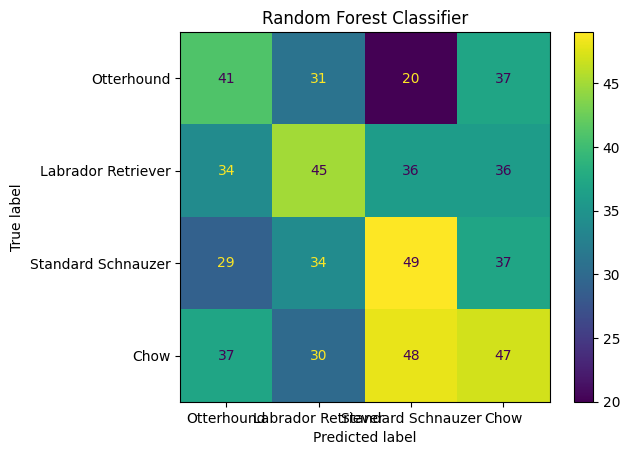

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/\n")
print("Used this website for plotting info: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html\n")
print("Used this website for Random Forest info: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html\n")

class_labels = {'Otterhound': 0, 'Labrador Retriever': 1, 'Standard Schnauzer': 2, 'Chow': 3}

all_histograms = []
all_labels = []
for class_name, histograms in training_set.items():
    all_histograms.extend(histograms)
    all_labels.extend([class_labels[class_name]] * len(histograms))

all_histograms = np.array(all_histograms)
all_labels = np.array(all_labels)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

all_true_labels = []
all_pred_labels = []

for train_index, test_index in stratified_k_fold.split(all_histograms, all_labels):
    X_train, X_test = all_histograms[train_index], all_histograms[test_index]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    all_true_labels.extend(y_test)
    all_pred_labels.extend(y_pred)

conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels.keys())
display.plot(cmap=plt.cm.viridis)
plt.title("Random Forest Classifier")
plt.show()


In [20]:
print("By visually comparing (e.g., looking at the color on the diagonal values, etc.) the three confusion matrices (on the test set), which do you think is the best method? Why? (0.50 point)")
print("By looking at the confusion matrices, I believe Random Forest classifier is the best method. I think this because Random Forest can handle more complex patterns which our data seems to be\n") 
print("Random Forest also is a group of trees, so it already beats the single decision tree, and naive bayes is too simple in its approach, so by that logic, Random Forest is the best out of the three classifiers\n")

By visually comparing (e.g., looking at the color on the diagonal values, etc.) the three confusion matrices (on the test set), which do you think is the best method? Why? (0.50 point)
By looking at the confusion matrices, I believe Random Forest classifier is the best method. I think this because Random Forest can handle more complex patterns which our data seems to be

Random Forest also is a group of trees, so it already beats the single decision tree, and naive bayes is too simple in its approach, so by that logic, Random Forest is the best out of the three classifiers



In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print("Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.25 point)")
print("Used this website for info: https://scikit-learn.org/stable/modules/cross_validation.html\n")

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 150),
    'Random Forest': RandomForestClassifier(random_state = 150)
}

mean_accuracies = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    mean_accuracy = scores.mean()
    accuracies[model_name] = mean_accuracy
    print(model_name, " mean validation accuracy: ", mean_accuracy)

print("The best method is: Random Forest")

Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.25 point)
Used this website for info: https://scikit-learn.org/stable/modules/cross_validation.html

Naive Bayes  mean validation accuracy:  0.3487793952967525
Decision Tree  mean validation accuracy:  0.2936842105263158
Random Forest  mean validation accuracy:  0.350996640537514
The best method is: Random Forest


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("Compute the accuracies for the three methods on the test set. Which is the best method? (0.25 point)")
print("Used this website for info: https://scikit-learn.org/stable/modules/model_evaluation.html\n")

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 150),
    'Random Forest': RandomForestClassifier(random_state = 150)
}

accuracies = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(model_name, "test accuracy", accuracy)

print("The best method is: Random Forest")

Compute the accuracies for the three methods on the test set. Which is the best method? (0.25 point)
Used this website for info: https://scikit-learn.org/stable/modules/model_evaluation.html

Naive Bayes test accuracy 0.3135593220338983
Decision Tree test accuracy 0.288135593220339
Random Forest test accuracy 0.3644067796610169
The best method is: Random Forest


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

print("Compute the F-measure for the three methods on the test set. Which is the best method? (0.25 point)")
print("Used this website for info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html\n")

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 150),
    'Random Forest': RandomForestClassifier(random_state = 150)
}

f1_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    f1 = f1_score(y_test, y_pred, average = 'weighted') 
    f1_scores[model_name] = f1
    print(model_name, "F-measure score on test set: ", f1)

print("The best method is: Random Forest")

Compute the F-measure for the three methods on the test set. Which is the best method? (0.25 point)
Used this website for info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Naive Bayes F-measure score on test set:  0.27481431794549965
Decision Tree F-measure score on test set:  0.28736659340067133
Random Forest F-measure score on test set:  0.35799031476997584
The best method is: Random Forest


In [28]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

print("7. (Model Selection) Use images from TWO classes. Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset obtained from the training set) for Support Vector Classifiers using LinearSVC such that parameter 𝐶 = 0.1, 1, 10, 100 and other parameters set as default. (2.5 points)")
print("Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/")
print("Used this website for stratified k-fold info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html")
print("Used this website for info: https://scikit-learn.org/dev/modules/generated/sklearn.svm.LinearSVC.html\n")

class_labels = ['Chow', 'Labrador Retriever']
selected_histograms = []
selected_labels = []

for class_name in class_labels:
    histograms = training_set[class_name]
    selected_histograms.extend(histograms)
    selected_labels.extend([class_name] * len(histograms)) 
 
selected_histograms = np.array(selected_histograms)
selected_labels = np.array(selected_labels)

C_values = [0.1, 1, 10, 100]
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 150)
stratified_k_fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 150)

results = {
    'standard_kfold': {C: [] for C in C_values},
    'stratified_kfold': {C: [] for C in C_values}
}

print("Standard 5-Fold Cross-Validation Results:")
for C in C_values:
    model = make_pipeline(StandardScaler(), LinearSVC(C = C, max_iter = 10000))
    scores = cross_val_score(model, selected_histograms, selected_labels, cv = k_fold)
    results['standard_kfold'][C] = scores
    print("C= ", C, ": Mean Accuracy: ", scores.mean(), "Std Dev: ", scores.std())

print("")

print("Stratified 5-Fold Cross-Validation Results:")
for C in C_values:
    model = make_pipeline(StandardScaler(), LinearSVC(C = C, max_iter = 10000))
    stratified_scores = cross_val_score(model, selected_histograms, selected_labels, cv = stratified_k_fold)
    results['stratified_kfold'][C] = stratified_scores
    print("C= ", C, ": Mean Accuracy: ", stratified_scores.mean(), "Std Dev: ", stratified_scores.std())

7. (Model Selection) Use images from TWO classes. Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset obtained from the training set) for Support Vector Classifiers using LinearSVC such that parameter 𝐶 = 0.1, 1, 10, 100 and other parameters set as default. (2.5 points)
Used this website for stratified k-fold info: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
Used this website for stratified k-fold info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
Used this website for info: https://scikit-learn.org/dev/modules/generated/sklearn.svm.LinearSVC.html

Standard 5-Fold Cross-Validation Results:
C=  0.1 : Mean Accuracy:  0.510957501280082 Std Dev:  0.07221121748920162
C=  1 : Mean Accuracy:  0.4982078853046595 Std Dev:  0.058782610854317054
C=  10 : Mean Accuracy:  0.49185867895545315 Std Dev:  0.06078378949248692
C=  100 : Mean Accu

Plot a graph (x-axis: 𝐶; y-axis: mean validation/training error (%)) containing four error curves (2 validation error curves and 2 training error curves - label them clearly using a legend to define the curves). Which 𝐶 has/have the lowest mean error for each curve? Comment about (1) the model complexity for SVM in relation to 𝐶, and (2) when/whether there is overfitting/underfitting. (1.5 points)
Used this website for stratified k-fold info: https://scikit-learn.org/stable/modules/learning_curve.html



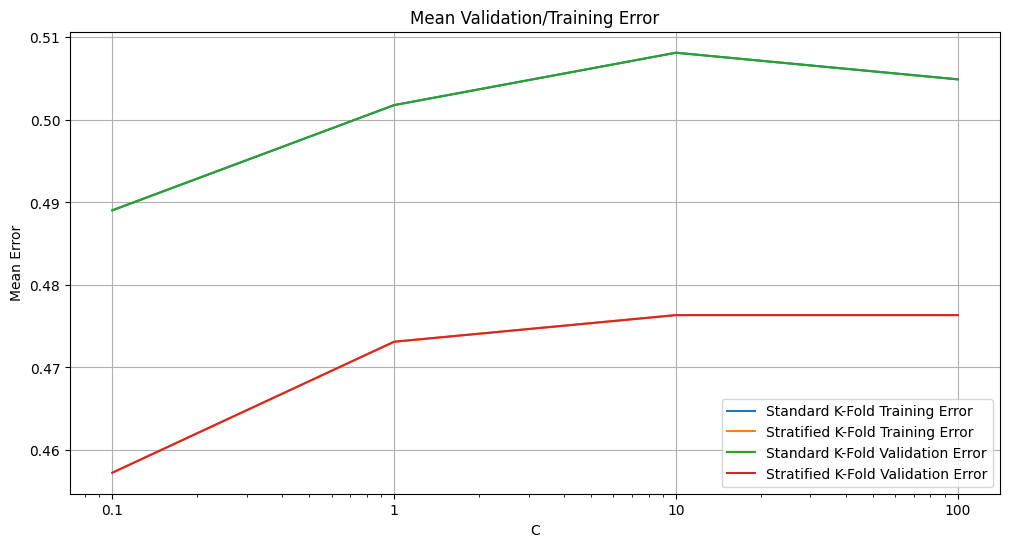


There may be something with the way I'm getting data because the graph does not look particularly right
Also there seems to be overlapping for two of my lines since I can only see two on the graph
That being said, the C that has the lowest mean error for standard is:  0.1 
and the C that has the lowest mean error for stratified is:  0.1
Our model complexity seems to increase as C increases for both standard and stratified k-fold methods. Also, our mean error increases greatly as our C increases, with stratified having a lot higher value than standard
Our model may be suffering from underfitting because we are getting relatively high training errors and validation errors


In [29]:
import numpy as np
import matplotlib.pyplot as plt

print("Plot a graph (x-axis: 𝐶; y-axis: mean validation/training error (%)) containing four error curves (2 validation error curves and 2 training error curves - label them clearly using a legend to define the curves). Which 𝐶 has/have the lowest mean error for each curve? Comment about (1) the model complexity for SVM in relation to 𝐶, and (2) when/whether there is overfitting/underfitting. (1.5 points)")
print("Used this website for stratified k-fold info: https://scikit-learn.org/stable/modules/learning_curve.html\n")

mean_train_errors_standard = [1 - np.mean(results['standard_kfold'][C]) for C in C_values]
mean_train_errors_stratified = [1 - np.mean(results['stratified_kfold'][C]) for C in C_values]

mean_validation_errors_standard = [1 - np.mean(results['standard_kfold'][C]) for C in C_values]
mean_validation_errors_stratified = [1 - np.mean(results['stratified_kfold'][C]) for C in C_values]

plt.figure(figsize=(12, 6))
plt.plot(C_values, mean_train_errors_standard, label = 'Standard K-Fold Training Error')
plt.plot(C_values, mean_train_errors_stratified, label = 'Stratified K-Fold Training Error')
plt.plot(C_values, mean_validation_errors_standard, label = 'Standard K-Fold Validation Error')
plt.plot(C_values, mean_validation_errors_stratified, label = 'Stratified K-Fold Validation Error')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Error')
plt.title('Mean Validation/Training Error')
plt.xticks(C_values, labels=C_values)
plt.legend()
plt.grid(True)
plt.show()

best_C_standard = C_values[np.argmin(mean_train_errors_standard)]
best_C_stratified = C_values[np.argmin(mean_validation_errors_stratified)]

print("\nThere may be something with the way I'm getting data because the graph does not look particularly right")
print("Also there seems to be overlapping for two of my lines since I can only see two on the graph")
print("That being said, the C that has the lowest mean error for standard is: ", best_C_standard, "\nand the C that has the lowest mean error for stratified is: ", best_C_stratified)
print("Our model complexity seems to increase as C increases for both standard and stratified k-fold methods. Also, our mean error increases greatly as our C increases, with stratified having a lot higher value than standard")
print("Our model may be suffering from underfitting because we are getting relatively high training errors and validation errors")

In [35]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("Use the 𝐶 value with the lowest mean validation error for your SVM classifier from the stratified 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized edge histogram dataset obtained from the test set)? (0.25 point)")
print("I tried this one but could not figure out the error with my input in time, so I am chalking it up as is.")

svm_model = SVC(C = best_c_value, kernel = 'linear', random_state = 150)
svm_model.fit(train_data_standardized, selected_labels)

y_pred = svm_model.predict(test_data_standardized)

test_accuracy = accuracy_score(test_labels, y_pred)

test_error_rate = 1 - test_accuracy

print("Test Error Rate for C = ", best_c_value, ": ", test_error_rate)

Use the 𝐶 value with the lowest mean validation error for your SVM classifier from the stratified 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized edge histogram dataset obtained from the test set)? (0.25 point)
I tried this one but could not figure out the error with my input in time, so I am chalking it up as is.


ValueError: Found input variables with inconsistent numbers of samples: [591, 313]